# Learning Rate Schedulers

In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras import backend as K

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [3]:
def quarter_step_decay(epoch):
    # initialize the base initial learning rate, drop factor, and epochs to drop every
    initAlpha = 0.01
    factor = 0.25
    dropEvery = 5
    
    # compute learning rate for the current epoch
    alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
    
    # return the learning rate
    return float(alpha)

In [4]:
# load the training and testing data, then scale it into the range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] loading CIFAR-10 data...


In [5]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

In [6]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
from classifiers.mini_vgg import MiniVGGNet

# define the set of callbacks to be passed to the model during training
callbacks = [LearningRateScheduler(quarter_step_decay)]

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
miniVGG = MiniVGGNet()
model = miniVGG.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [8]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, callbacks=callbacks, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 71s 1ms/step - loss: 1.6455 - acc: 0.4529 - val_loss: 1.3425 - val_acc: 0.5371
Epoch 2/40
50000/50000 [==============================] - 68s 1ms/step - loss: 1.1677 - acc: 0.5958 - val_loss: 0.9339 - val_acc: 0.6782
Epoch 3/40
50000/50000 [==============================] - 68s 1ms/step - loss: 0.9859 - acc: 0.6596 - val_loss: 0.8705 - val_acc: 0.6947
Epoch 4/40
50000/50000 [==============================] - 68s 1ms/step - loss: 0.8762 - acc: 0.6958 - val_loss: 0.8408 - val_acc: 0.7054
Epoch 5/40
50000/50000 [==============================] - 68s 1ms/step - loss: 0.7357 - acc: 0.7424 - val_loss: 0.6669 - val_acc: 0.7658
Epoch 6/40
50000/50000 [==============================] - 69s 1ms/step - loss: 0.6830 - acc: 0.7603 - val_loss: 0.6580 - val_acc: 0.7687
Epoch 7/40
50000/50000 [==============================] - 69s 1ms/step - loss: 0.6567 - acc: 0.7685 -

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.83      0.79      0.81      1000
  automobile       0.92      0.89      0.90      1000
        bird       0.75      0.67      0.71      1000
         cat       0.63      0.61      0.62      1000
        deer       0.71      0.82      0.76      1000
         dog       0.71      0.69      0.70      1000
        frog       0.82      0.87      0.85      1000
       horse       0.84      0.83      0.84      1000
        ship       0.87      0.91      0.89      1000
       truck       0.88      0.87      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.79     10000



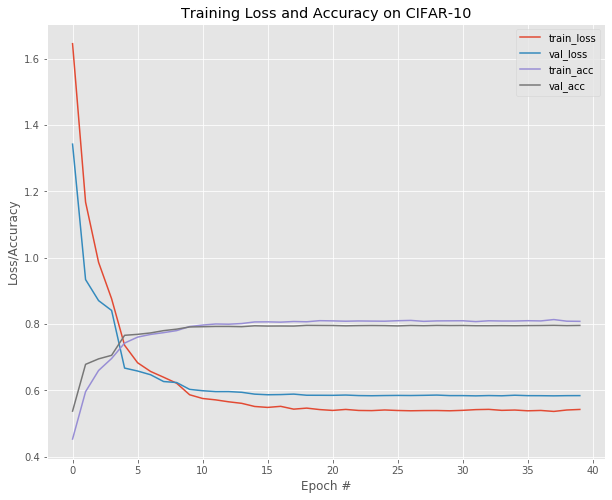

In [10]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [11]:
def half_step_decay(epoch):
    # initialize the base initial learning rate, drop factor, and epochs to drop every
    initAlpha = 0.01
    factor = 0.5
    dropEvery = 5
    
    # compute learning rate for the current epoch
    alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
    
    # return the learning rate
    return float(alpha)

In [13]:
# define the set of callbacks to be passed to the model during training
callbacks = [LearningRateScheduler(half_step_decay)]

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
miniVGG = MiniVGGNet()
model = miniVGG.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, callbacks=callbacks, verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 70s 1ms/step - loss: 1.6360 - acc: 0.4587 - val_loss: 1.1909 - val_acc: 0.5800
Epoch 2/40
50000/50000 [==============================] - 68s 1ms/step - loss: 1.1616 - acc: 0.6002 - val_loss: 0.9990 - val_acc: 0.6455
Epoch 3/40
50000/50000 [==============================] - 69s 1ms/step - loss: 0.9903 - acc: 0.6568 - val_loss: 1.0448 - val_acc: 0.6535
Epoch 4/40
50000/50000 [==============================] - 70s 1ms/step - loss: 0.8764 - acc: 0.6953 - val_loss: 0.8341 - val_acc: 0.7102
Epoch 5/40
50000/50000 [==============================] - 70s 1ms/step - loss: 0.7440 - acc: 0.7391 - val_loss: 0.7006 - val_acc: 0.7582
Epoch 6/40
50000/50000 [==============================] - 70s 1ms/step - loss: 0.6864 - acc: 0.7573 - val_loss: 0.6764 - val_acc: 0.7687
Epoch 7/40
50000/50000 [==============================] - 70s 1ms/step - lo

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.86      0.82      0.84      1000
  automobile       0.91      0.89      0.90      1000
        bird       0.77      0.69      0.73      1000
         cat       0.67      0.66      0.66      1000
        deer       0.75      0.82      0.78      1000
         dog       0.73      0.73      0.73      1000
        frog       0.82      0.90      0.86      1000
       horse       0.88      0.85      0.87      1000
        ship       0.90      0.91      0.90      1000
       truck       0.86      0.89      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



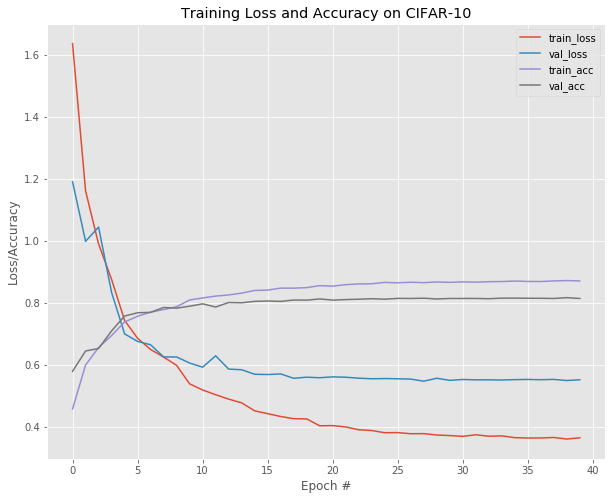

In [15]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Well Done